# Exercise: Cross-Validation and Model Selection


`#scikit-learn` `#cross-validation` `#model-selection`


> Objectives:
>
> Understand how cross-validation works and why it’s essential for model selection
> Use Scikit-Learn to implement k-fold cross-validation
> Compare different models based on cross-validation results


## Standard Deep Atlas Exercise Set Up


- [x] Ensure you are using the coursework Pipenv environment and kernel ([instructions](../SETUP.md))
- [x] Apply the standard Deep Atlas environment setup process by running this cell:


In [3]:
import sys, os
sys.path.insert(0, os.path.join('..', 'includes'))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()
if deep_atlas.environment == 'COLAB':
    %pip install -q python-dotenv==1.0.0

🎉 Running in a Virtual environment


## 🚦 Checkpoint: Start

- [x] Run this cell to record your start time:


In [4]:
deep_atlas.log_start_time()

🚀 Success! Get started...


---


## Context


Cross-validation is an essential technique for evaluating models when selecting the best-performing one. Instead of relying on a single train-test split, cross-validation splits the dataset into several parts, cycling through training and testing on different portions of the data. This results in a more reliable estimate of model performance.

In this exercise, we will:

1. Use k-fold cross-validation to evaluate different models.
2. Visualize how cross-validation splits the data.
3. Compare multiple models to determine the best-performing one.


## Imports


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Data


For the purposes of illustration, we will use the Olivetti Faces Dataset to classify faces based on image properties.

- [x] Load the dataset and split the data into training and test sets:


In [12]:
# Load the Olivetti Faces dataset
data = fetch_olivetti_faces()
X = data.data
y = (data.target > 19).astype(int)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/python/scikit_learn_data


- [x] Visualize the first few samples


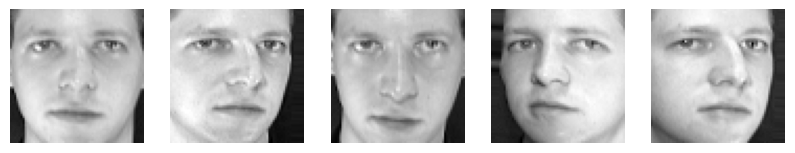

In [13]:
def visualize_images(X, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
    for i in range(num_images):
        axes[i].imshow(X[i].reshape(64, 64), cmap="gray")
        axes[i].axis("off")
    plt.show()


# Visualize the first 5 images
visualize_images(X, num_images=5)

- [x] Split the data into train and test sets:
  - Note the lack of a validation set — we will use Cross-validation to do the validation-during-training.


In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Cross-Validation Visualization


- [x] The following function will allow us to see how the data is split up for training and validation.
  - Run the cell to initialize it:


In [15]:
# Visualization of Cross-Validation Splits
def plot_cross_val_splits(X, y, skf, title):
    plt.figure(figsize=(10, 6))

    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        # Plot training data in blue
        plt.scatter(
            train_idx,
            [fold_idx + 1] * len(train_idx),
            label="Train",
            color="blue",
            s=10,
        )
        # Plot test data in red
        plt.scatter(
            test_idx,
            [fold_idx + 1] * len(test_idx),
            label="Validation",
            color="red",
            s=10,
        )

    plt.title(title)
    plt.xlabel("Sample index")
    plt.ylabel("Fold number")
    plt.legend(
        handles=[
            plt.Line2D([0], [0], color="blue", label="Train"),
            plt.Line2D([0], [0], color="red", label="Validation"),
        ]
    )
    plt.show()

- [x] Visualize how k-fold cross-validation splits the data. Use StratifiedKFold to ensure that the splits preserve the class distribution.


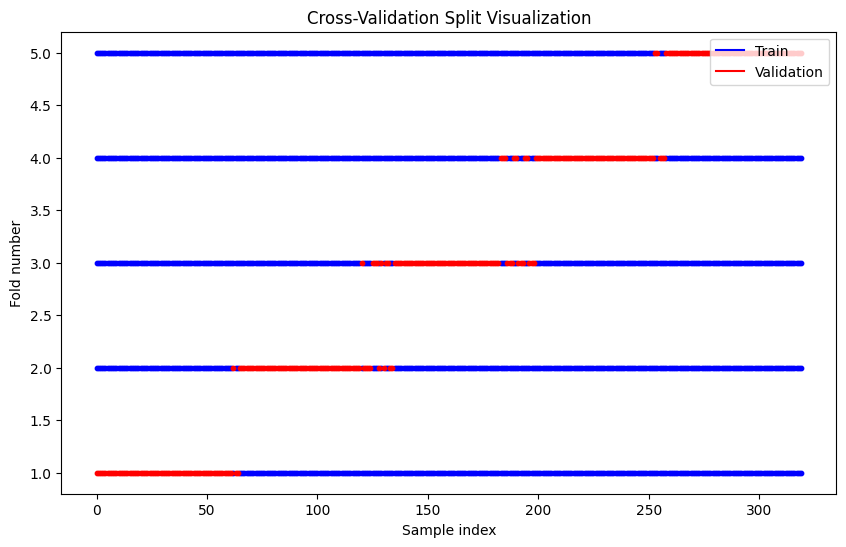

In [16]:
# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Plot the cross-validation splits
plot_cross_val_splits(
    X_train, y_train, skf, "Cross-Validation Split Visualization"
)

`StratifiedKFold` splits the training data into 5 "folds", maintaining the proportion of classes in each fold.

- The portion highlighted in red is the fifth set aside for validation. The rest of the data will be used to train an instance of the model in question.


## Model Selection with Cross-Validation


We will now evaluate three models using **5-fold cross-validation**: Logistic Regression, Support Vector Machine (SVM), and k-Nearest Neighbors (k-NN).

- [x] Define the models and evaluate them:


In [17]:
# Define models for comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
}

# Loop through models and evaluate each using 5-fold cross-validation
for name, model in models.items():
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(
        model, X_train, y_train, cv=5, scoring="accuracy"
    )

    # Print the average accuracy for each model
    print(f"{name} - Cross-Validation Accuracy: {np.mean(cv_scores):.3f}")

Logistic Regression - Cross-Validation Accuracy: 0.906
SVM - Cross-Validation Accuracy: 0.900
k-NN - Cross-Validation Accuracy: 0.872


The `cross_val_score` function performs training 15 times (3 models ✕ 5 data folds) and outputs the average score per model.

- "score" is determined by the scoring argument — you can use different evaluation criteria depending on the task you are solving.

In this case, we see that Logistic Regression scored the highest.


### 🚦 Checkpoint: Stop

- [x] Uncomment this code
- [x] Complete the feedback form
- [x] Run the cell to log your responses and record your stop time:


```python
# deep_atlas.log_feedback(
#     {
#         # How long were you actively focused on this section? (HH:MM)
#         "active_time": 00:30,
#         # Did you feel finished with this section (Yes/No):
#         "finished": yes,
#         # How much did you enjoy this section? (1–5)
#         "enjoyment": 4,
#         # How useful was this section? (1–5)
#         "usefulness": 4,
#         # Did you skip any steps?
#         "skipped_steps": no,
#         # Any obvious opportunities for improvement?
#         "suggestions": [],
#     }
# )
# deep_atlas.log_stop_time()
```


## You did it!


In this exercise, you explored how cross-validation works and used it to compare multiple models. By visualizing the data splits, you gained a better understanding of how k-fold cross-validation ensures robust evaluation across different portions of the dataset.

Cross-validation allows us to assess model performance in a more reliable way than a simple train-test split. In future projects, cross-validation should be your go-to method for evaluating models, especially when comparing different algorithms or tuning hyperparameters.
